In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

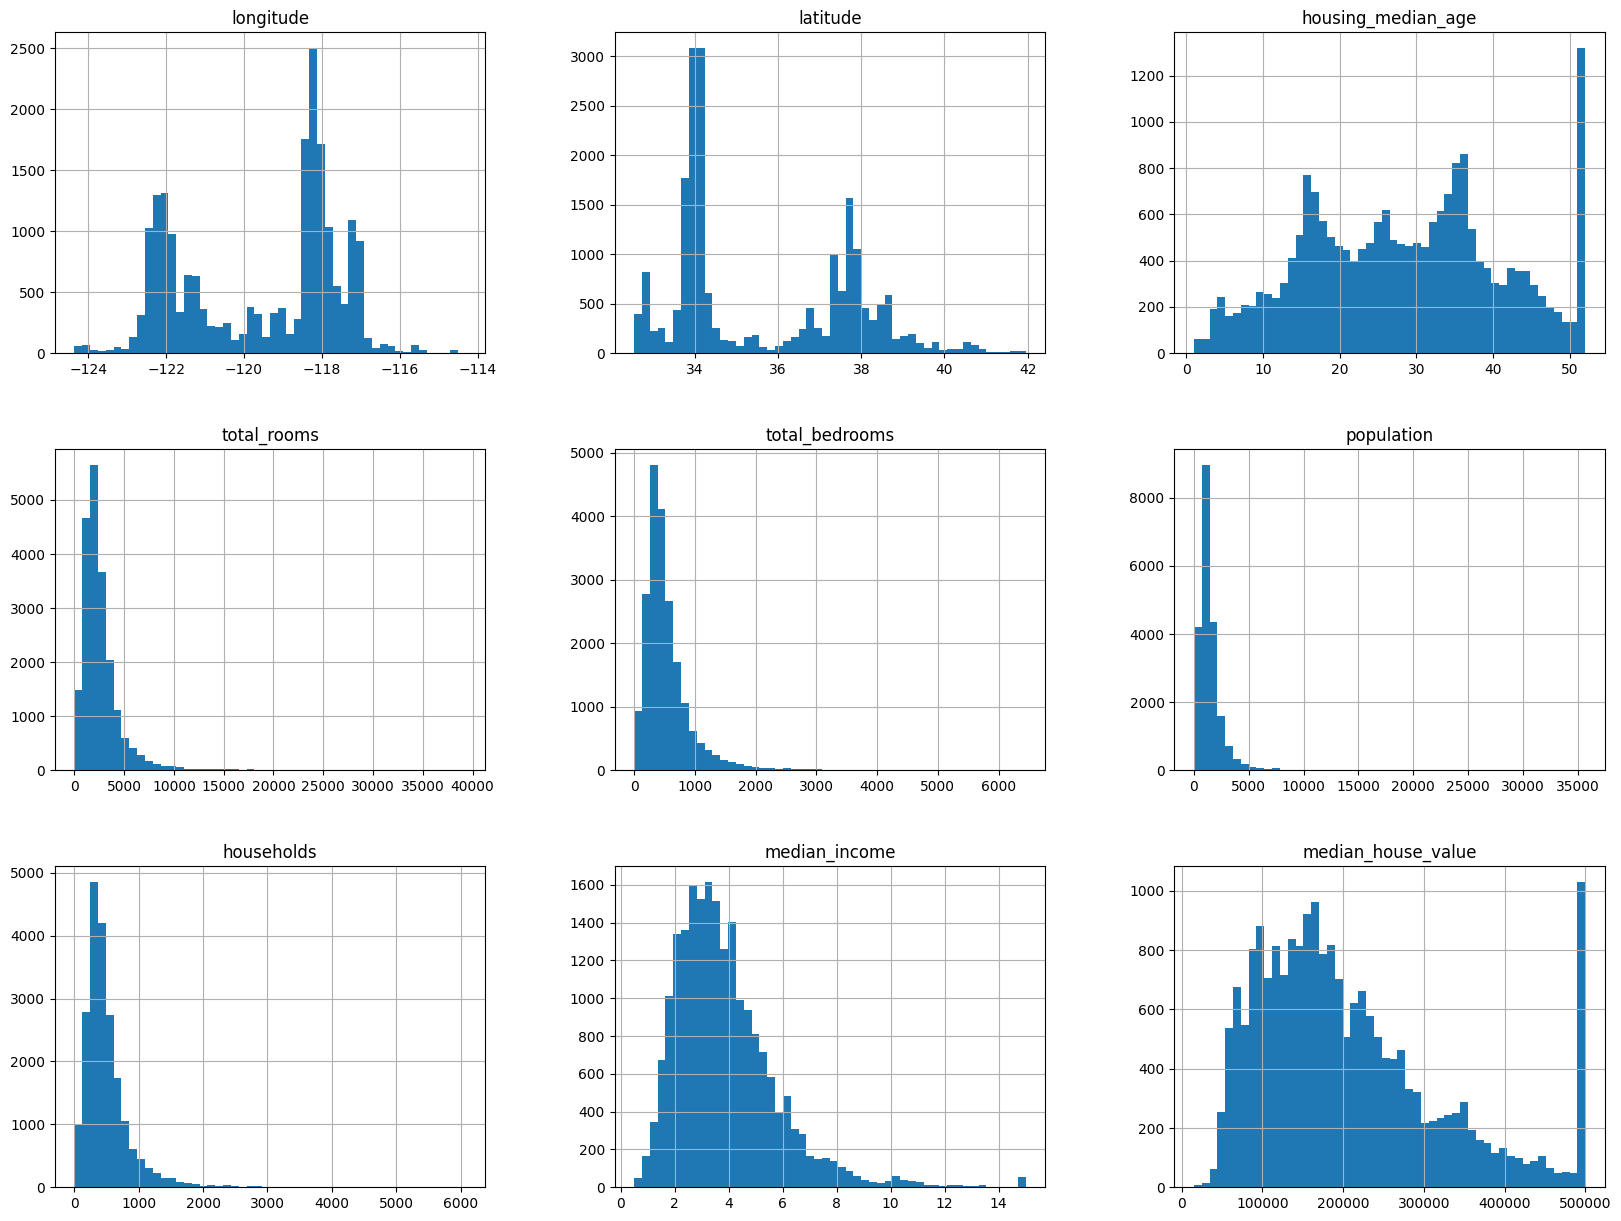

In [6]:
data.hist(bins=50, figsize=(20, 15))

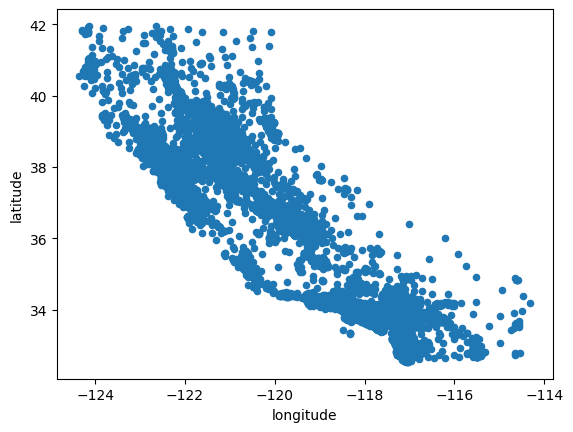

In [7]:
data.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

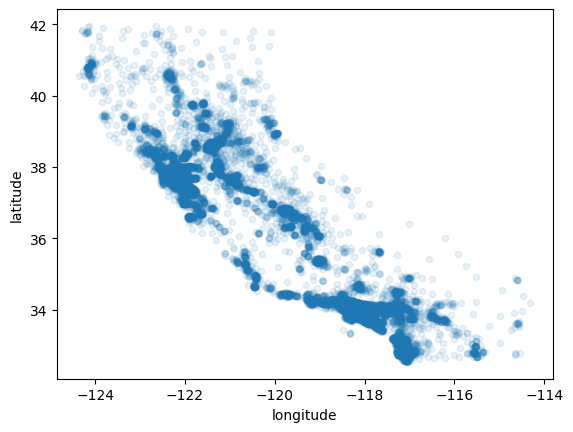

In [8]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

C:\Users\olvad\AppData\Local\Temp\ipykernel_10496\1966532190.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


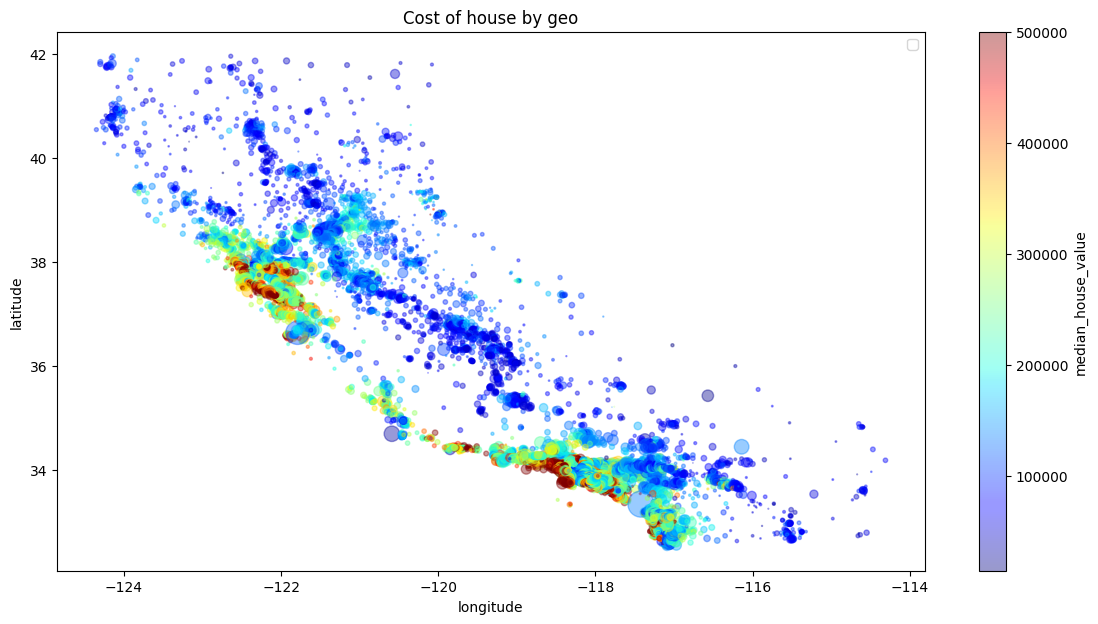

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100, figsize=(14, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, title="Cost of house by geo")
plt.legend()
plt.show()

<Axes: >

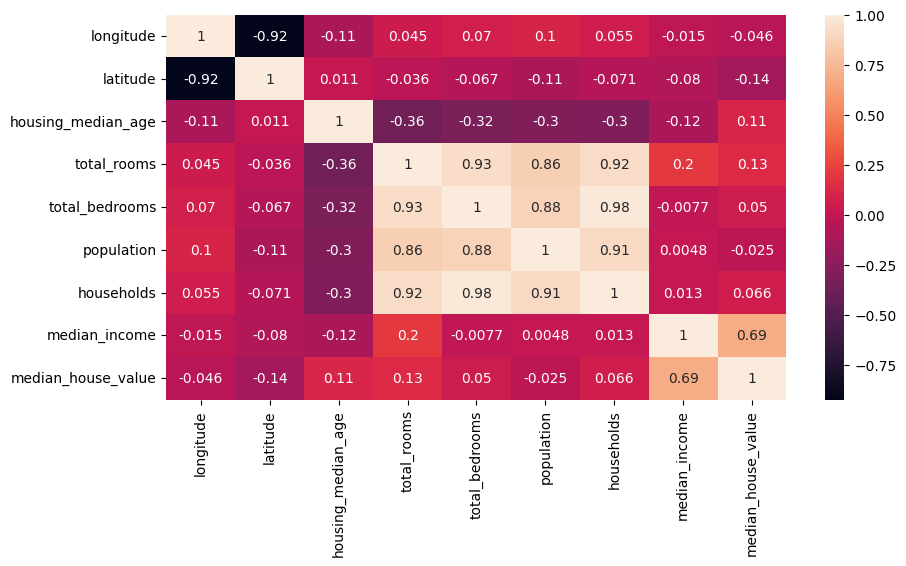

In [10]:
# Drop the categorical variable 'ocean_proximity' from the correlation matrix
correlation_matrix = data.drop('ocean_proximity', axis=1).corr()

# Plot the heatmap with the updated correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(data=correlation_matrix, annot=True)


In [11]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Combinacion de atributos

- `rooms_per_household`: Proporciona una medida de densidad de habitaciones de una vivienda en esa area
- `bedrooms_per_room`: Indica la proporcion de dormitorios repecto al numero total de habitacion en esa area
- `population_per_household`: Representa la poblacion promedio en una vivienda en esa area

In [12]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] =  data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"] 
corr_matrix  = data.drop('ocean_proximity', axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Limpieza de datos
Manejar Atributos categoricos

In [13]:
import numpy as np

x = [1, 2, 3, np.nan]
x1 = pd.Series(x)
x1

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [14]:
x1.mean()

2.0

In [15]:
x = [1, 2, 3, 0]
x1 = pd.Series(x)
x1

0    1
1    2
2    3
3    0
dtype: int64

In [16]:
x1.mean()

1.5

In [17]:
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


C:\Users\olvad\AppData\Local\Temp\ipykernel_10496\896265076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)


In [18]:
# manipulacion de datos categoricos
from sklearn.preprocessing import OrdinalEncoder

data_ocean = data[["ocean_proximity"]]
ordinal_enconder = OrdinalEncoder()
data_ocean_encoded = ordinal_enconder.fit_transform(data_ocean)
data_ocean_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

data_1_hot_encoder = one_hot_encoder.fit_transform(data_ocean )

In [20]:
data_1_hot_encoder.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
encoded_df = pd.DataFrame(data_1_hot_encoder.toarray(), columns=one_hot_encoder.categories_)
encoded_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [22]:
y = data["median_house_value"].values.reshape(-1, 1)

In [26]:
x = data[[
  "median_income",
  "rooms_per_household",
  "total_rooms",
  "housing_median_age",
  "households"
]]

In [29]:
data_full = pd.concat([x, encoded_df], axis=1)
data_full.columns

Index([      'median_income', 'rooms_per_household',         'total_rooms',
        'housing_median_age',          'households',        ('<1H OCEAN',),
                 ('INLAND',),           ('ISLAND',),         ('NEAR BAY',),
             ('NEAR OCEAN',)],
      dtype='object')

In [30]:
x = data_full.values

In [31]:
### regression lineal multiple

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

y_predict = linear_regression.predict(x_test)

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predict)
r2

0.5934326451877902

### Escalar variables

In [41]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()

x = ss_x.fit_transform(x)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

y_predict = linear_regression.predict(x_test)

In [43]:
r2 = r2_score(y_test, y_predict)
r2

0.5934299586834049

### TREES

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
columns = [
  "median_income",
  "rooms_per_household",
  "total_rooms",
  "housing_median_age",
  "households",
  "longitude",
  "latitude"
]

cols_model = []
y = data["median_house_value"].values.reshape(-1, 1)

for col in columns:
  cols_model.append(col)
  data1 = data[cols_model]
  data1 = pd.concat([data1, encoded_df], axis=1)
  x = data1.values
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  
  tree_reg = DecisionTreeRegressor()
  tree_reg.fit(x_train, y_train)
  y_predict = tree_reg.predict(x_test)
  
  r2 = r2_score(y_test, y_predict)
  print(cols_model, r2)

['median_income'] 0.263448812306573
['median_income', 'rooms_per_household'] 0.21507270121548583
['median_income', 'rooms_per_household', 'total_rooms'] 0.21486190319157006
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.343623516034934
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.3190263322691135
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'longitude'] 0.49444347695463087
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'longitude', 'latitude'] 0.630470961008078


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
columns = [
  "median_income",
  "rooms_per_household",
  "total_rooms",
  "housing_median_age",
  "households",
  "longitude",
  "latitude"
]

cols_model = []
y = data["median_house_value"].values

In [52]:
for col in columns:
  cols_model.append(col)
  data1 = data[cols_model]
  data1 = pd.concat([data1, encoded_df], axis=1)
  x = data1.values
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  
  forest_reg = RandomForestRegressor()
  forest_reg.fit(x_train, y_train)
  
  y_predict = forest_reg.predict(x_test)
  
  r2 = r2_score(y_test, y_predict)
  print(cols_model, r2)

['median_income'] 0.4483780400067686
['median_income', 'rooms_per_household'] 0.5479292465505432
['median_income', 'rooms_per_household', 'total_rooms'] 0.5864250041179417
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.6414498588427674
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.6422191563385169
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'longitude'] 0.7383821961517758
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'longitude', 'latitude'] 0.8175897446025161
